In [1]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.optimizers import Adam
import numpy as np

filename = "Data/dataset.npz"

# Load numpy array
dataset = np.load(filename)

x_dataset_full = dataset['x']
y_dataset_full = dataset['y']

x_test = x_dataset_full[4000:5000]
y_test = y_dataset_full[4000:5000]

x_dataset = x_dataset_full[:4000]
y_dataset = y_dataset_full[:4000]

x_val = x_dataset[3200:]
y_val = y_dataset[3200:]

x_train = x_dataset[:3200]
y_train = y_dataset[:3200]

# Assign and reshape data
x_train, y_train = x_train.reshape(3200, 1280, 64), y_train.reshape(3200, 1280, 64)
x_val, y_val = x_val.reshape(800, 1280, 64), y_val.reshape(800, 1280, 64)
x_test, y_test = x_test.reshape(1000, 1280, 64), y_test.reshape(1000, 1280, 64)

print("Training shape: ", x_train.shape, y_train.shape)
print("Validation shape: ", x_val.shape, x_val.shape)
print("Test shape: ", x_test.shape, y_test.shape)

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Training shape:  (3200, 1280, 64) (3200, 1280, 64)
Validation shape:  (800, 1280, 64) (800, 1280, 64)
Test shape:  (1000, 1280, 64) (1000, 1280, 64)


In [2]:
# Base model
model = Sequential()
model.add(LSTM(64, input_shape=(1280, 64), return_sequences=True))
model.summary()
adam = Adam(lr=0.00005)
model.compile(optimizer=adam, loss='mean_absolute_error', metrics=['acc'])

# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=400,
                    batch_size=16,
                    validation_data=(x_val, y_val),
                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1280, 64)          33024     
Total params: 33,024
Trainable params: 33,024
Non-trainable params: 0
_________________________________________________________________
Train on 3200 samples, validate on 800 samples
Epoch 1/400
3200/3200 [==============================] - 378s 118ms/step - loss: 0.0564 - acc: 0.0192 - val_loss: 0.0876 - val_acc: 0.0171
Epoch 2/400
3200/3200 [==============================] - 366s 114ms/step - loss: 0.0429 - acc: 0.0225 - val_loss: 0.0776 - val_acc: 0.0105
Epoch 3/400
3200/3200 [==============================] - 368s 115ms/step - loss: 0.0369 - acc: 0.0235 - val_loss: 0.0716 - val_acc: 0.0083
Epoch 4/400
3200/3200 [==============================] - 363s 113ms/step - loss: 0.0329 - acc: 0.0233 - val_loss: 0.0674 - val_acc: 0.0073
Epoch 5/400
3200/3200 [==============================] - 368s 1

Epoch 56/400
3200/3200 [==============================] - 371s 116ms/step - loss: 0.0168 - acc: 0.1344 - val_loss: 0.0494 - val_acc: 0.1326
Epoch 57/400
3200/3200 [==============================] - 368s 115ms/step - loss: 0.0168 - acc: 0.1308 - val_loss: 0.0494 - val_acc: 0.1327
Epoch 58/400
3200/3200 [==============================] - 369s 115ms/step - loss: 0.0168 - acc: 0.1305 - val_loss: 0.0494 - val_acc: 0.1745
Epoch 59/400
3200/3200 [==============================] - 371s 116ms/step - loss: 0.0168 - acc: 0.1291 - val_loss: 0.0494 - val_acc: 0.1733
Epoch 60/400
3200/3200 [==============================] - 373s 117ms/step - loss: 0.0168 - acc: 0.1471 - val_loss: 0.0494 - val_acc: 0.1237
Epoch 61/400
3200/3200 [==============================] - 373s 116ms/step - loss: 0.0168 - acc: 0.1241 - val_loss: 0.0494 - val_acc: 0.1215
Epoch 62/400
3200/3200 [==============================] - 374s 117ms/step - loss: 0.0168 - acc: 0.1365 - val_loss: 0.0494 - val_acc: 0.1522
Epoch 63/400
3200/32

3200/3200 [==============================] - 360s 112ms/step - loss: 0.0168 - acc: 0.1656 - val_loss: 0.0494 - val_acc: 0.1748
Epoch 115/400
3200/3200 [==============================] - 361s 113ms/step - loss: 0.0168 - acc: 0.1781 - val_loss: 0.0494 - val_acc: 0.1742
Epoch 116/400
3200/3200 [==============================] - 364s 114ms/step - loss: 0.0168 - acc: 0.1615 - val_loss: 0.0494 - val_acc: 0.2002
Epoch 117/400
3200/3200 [==============================] - 364s 114ms/step - loss: 0.0168 - acc: 0.1646 - val_loss: 0.0494 - val_acc: 0.1632
Epoch 118/400
3200/3200 [==============================] - 362s 113ms/step - loss: 0.0168 - acc: 0.1707 - val_loss: 0.0494 - val_acc: 0.2097
Epoch 119/400
3200/3200 [==============================] - 365s 114ms/step - loss: 0.0168 - acc: 0.1713 - val_loss: 0.0494 - val_acc: 0.1863
Epoch 120/400
3200/3200 [==============================] - 360s 113ms/step - loss: 0.0168 - acc: 0.1673 - val_loss: 0.0494 - val_acc: 0.1693
Epoch 121/400
3200/3200 [==

3200/3200 [==============================] - 372s 116ms/step - loss: 0.0168 - acc: 0.1909 - val_loss: 0.0494 - val_acc: 0.2456
Epoch 173/400
3200/3200 [==============================] - 371s 116ms/step - loss: 0.0168 - acc: 0.2014 - val_loss: 0.0494 - val_acc: 0.1939
Epoch 174/400
3200/3200 [==============================] - 374s 117ms/step - loss: 0.0168 - acc: 0.1947 - val_loss: 0.0494 - val_acc: 0.2100
Epoch 175/400
3200/3200 [==============================] - 373s 116ms/step - loss: 0.0168 - acc: 0.1951 - val_loss: 0.0494 - val_acc: 0.1957
Epoch 176/400
3200/3200 [==============================] - 369s 115ms/step - loss: 0.0168 - acc: 0.1935 - val_loss: 0.0494 - val_acc: 0.2251
Epoch 177/400
3200/3200 [==============================] - 375s 117ms/step - loss: 0.0168 - acc: 0.2011 - val_loss: 0.0494 - val_acc: 0.2000
Epoch 178/400
3200/3200 [==============================] - 371s 116ms/step - loss: 0.0168 - acc: 0.2010 - val_loss: 0.0494 - val_acc: 0.2306
Epoch 179/400
3200/3200 [==

3200/3200 [==============================] - 363s 113ms/step - loss: 0.0168 - acc: 0.2116 - val_loss: 0.0494 - val_acc: 0.2572
Epoch 231/400
3200/3200 [==============================] - 366s 114ms/step - loss: 0.0168 - acc: 0.2000 - val_loss: 0.0494 - val_acc: 0.2347
Epoch 232/400
3200/3200 [==============================] - 362s 113ms/step - loss: 0.0168 - acc: 0.2122 - val_loss: 0.0494 - val_acc: 0.2277
Epoch 233/400
3200/3200 [==============================] - 368s 115ms/step - loss: 0.0168 - acc: 0.2058 - val_loss: 0.0494 - val_acc: 0.2212
Epoch 234/400
3200/3200 [==============================] - 366s 114ms/step - loss: 0.0168 - acc: 0.2101 - val_loss: 0.0494 - val_acc: 0.2190
Epoch 235/400
3200/3200 [==============================] - 367s 115ms/step - loss: 0.0168 - acc: 0.2185 - val_loss: 0.0494 - val_acc: 0.2181
Epoch 236/400
3200/3200 [==============================] - 369s 115ms/step - loss: 0.0168 - acc: 0.2192 - val_loss: 0.0494 - val_acc: 0.2847
Epoch 237/400
3200/3200 [==

3200/3200 [==============================] - 376s 117ms/step - loss: 0.0168 - acc: 0.2182 - val_loss: 0.0494 - val_acc: 0.2694
Epoch 289/400
3200/3200 [==============================] - 371s 116ms/step - loss: 0.0168 - acc: 0.2166 - val_loss: 0.0494 - val_acc: 0.2342
Epoch 290/400
3200/3200 [==============================] - 374s 117ms/step - loss: 0.0168 - acc: 0.2104 - val_loss: 0.0494 - val_acc: 0.3902
Epoch 291/400
3200/3200 [==============================] - 369s 115ms/step - loss: 0.0168 - acc: 0.2100 - val_loss: 0.0494 - val_acc: 0.2450
Epoch 292/400
3200/3200 [==============================] - 369s 115ms/step - loss: 0.0168 - acc: 0.2136 - val_loss: 0.0494 - val_acc: 0.2534
Epoch 293/400
3200/3200 [==============================] - 369s 115ms/step - loss: 0.0168 - acc: 0.2183 - val_loss: 0.0494 - val_acc: 0.2442
Epoch 294/400
3200/3200 [==============================] - 373s 117ms/step - loss: 0.0168 - acc: 0.2302 - val_loss: 0.0494 - val_acc: 0.2363
Epoch 295/400
3200/3200 [==

3200/3200 [==============================] - 370s 116ms/step - loss: 0.0168 - acc: 0.2151 - val_loss: 0.0494 - val_acc: 0.2464
Epoch 347/400
3200/3200 [==============================] - 372s 116ms/step - loss: 0.0168 - acc: 0.2313 - val_loss: 0.0494 - val_acc: 0.2527
Epoch 348/400
3200/3200 [==============================] - 367s 115ms/step - loss: 0.0168 - acc: 0.2534 - val_loss: 0.0494 - val_acc: 0.2533
Epoch 349/400
3200/3200 [==============================] - 366s 114ms/step - loss: 0.0168 - acc: 0.2542 - val_loss: 0.0494 - val_acc: 0.2552
Epoch 350/400
3200/3200 [==============================] - 359s 112ms/step - loss: 0.0168 - acc: 0.2287 - val_loss: 0.0494 - val_acc: 0.2587
Epoch 351/400
3200/3200 [==============================] - 363s 113ms/step - loss: 0.0168 - acc: 0.2161 - val_loss: 0.0494 - val_acc: 0.2570
Epoch 352/400
3200/3200 [==============================] - 359s 112ms/step - loss: 0.0168 - acc: 0.2198 - val_loss: 0.0494 - val_acc: 0.2482
Epoch 353/400
3200/3200 [==

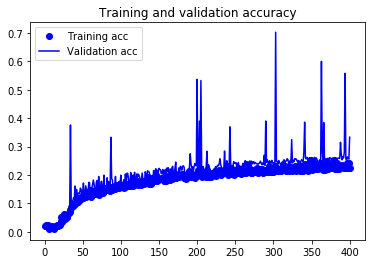

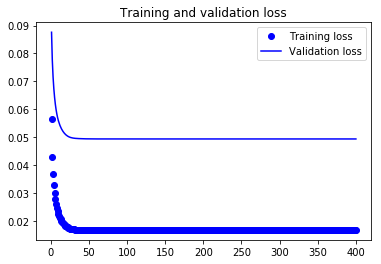

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [4]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

1000/1000 [==============================] - 14s 14ms/step
Test accuracy: 0.4845054681301117
Test loss: 0.022421445555213724
